In [2]:

#importing packages and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [202]:
df=pd.read_csv("C:\PC Files\The Pursuit Of Happiness\Data Sets\haberman.csv") #importing the dataset
df.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


The dataset has four(4) labes which are: 

Age which describes age of the patient when the operation was performed.

Year which describes the year in which the patient had the operation.

Nodes which describe the number of axiliary nodes which the patient had at the time of operation.

Status which describes whether tha patient has lived past 5 years post opernation where '1' being alive and '2' being passed away.

In [199]:
df.info() #Gathering info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


The dataset has 306 values in each feature and doesn't contain any null values

In [203]:
df["survival_status"]=df['status'].map({1:'survived',2:'dead'}) #coverting the status feature.
del df['status']

As the status feature can't be used to obtain much information it shall be converted to a more detailed values in which '1' will be replaced with 'survived' and 2 being replaced with 'dead'

Hence hereby the status feature is renamed as survival_status.

The survival charectistic will be extensively used to quantify the scale of the results

In [193]:
df.head() #observing the first few values of the data

,age,year,nodes,survival_status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


# Statistical Data

In [216]:
df.describe() # describing the data to get statistical values

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


The Dataset is on the shorter side with only 306 entries

The important thing to be noted is that the 75% of the patients have nodes <=4

The age of the patients are from 30 to 83.

75% of the patients have age <=60

In [195]:
df['survival_status'].value_counts() #counting the number of people who have survived and died.

survived    225
dead         81
Name: survival_status, dtype: int64

The data is not balanced as survived people are far greater than those who died.

225:81 is not balanced data.

In [173]:
df['survival_status'].value_counts(normalize='True') # calculating the percentage of those who survived and those who died.

survived    0.735294
dead        0.264706
Name: survival_status, dtype: float64

It can be observed that 73% of the patients who had the operation have successfully survived past five years while 26% have died.

## Univariate Analysis

In univariate analysis, each individual feature in the given dataset is plotted so as to derive the meaning behind the data.

Distribution plots have been used here so that we can guage the number of people who have survived while taking into account the individual feature.

C:\Users\Drac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Drac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


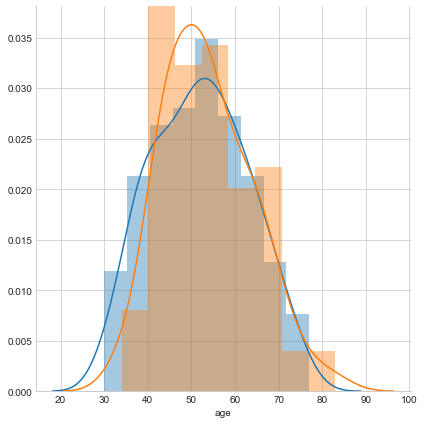

In [95]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='survived_status',size=6).map(sns.distplot,'age')

The age of patients lies between the range of 30 to 85

It has been observed that patients between the ages 40 and 60 have a lesser survival rate than the rest.

While the patients between 30 and 50 have an improved survial percentage.

C:\Users\Drac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Drac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


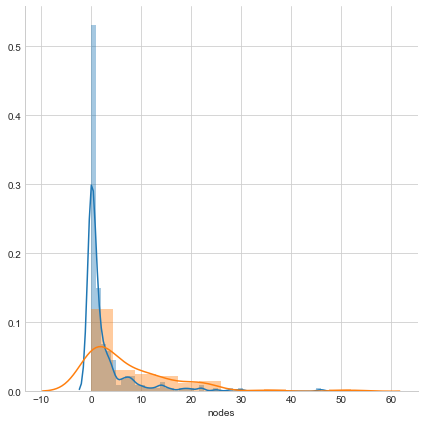

In [148]:
sns.FacetGrid(df,hue='survival_status',size=6).map(sns.distplot,'nodes')

It is observed that patients with lower number of nodes have a much higher survival rate.

Specifically patients who have <2 nodes can be observed to have survived for greater than 5 years.

## Cumulative Distribution function

CDF is used to determine what percentage values lie below a particular value.

In [206]:
# calculating the cdf of nodes so as to determine what percentage of people have nodes below 10,20,etc...
counts,bin_edges=np.histogram(df['nodes'],bins=20,density=True)
pdf=counts/sum(counts)
print(pdf)
print(counts)

[0.64379085 0.12745098 0.04575163 0.05228758 0.01960784 0.03921569
 0.00980392 0.01633987 0.02287582 0.00653595 0.00326797 0.00326797
 0.         0.00326797 0.         0.         0.         0.00326797
 0.         0.00326797]
[0.24761187 0.04901961 0.01759678 0.02011061 0.00754148 0.01508296
 0.00377074 0.00628457 0.00879839 0.00251383 0.00125691 0.00125691
 0.         0.00125691 0.         0.         0.         0.00125691
 0.         0.00125691]


The numerical values of the probability distribution function array and the bin_edges(bin values in histogram)

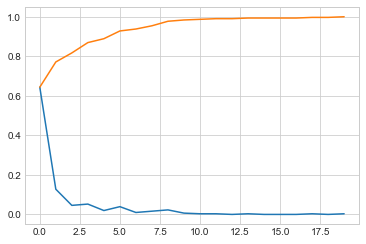

In [207]:
cdf=np.cumsum(pdf) #calculating the cumulative sum
plt.plot(pdf) #plotting the probability function on a normal distribution
plt.plot(cdf) #plotting the cumulative function on the same normal distribution
plt.show()


The cumulative sum shows how much percentage of people have nodes below a specific number.

We can observe that 64% of people have <=1 node and 90% of people have <=5 nodes.

## Box Plots

Box plots are used to determine how the data is distributed between the quartiles.

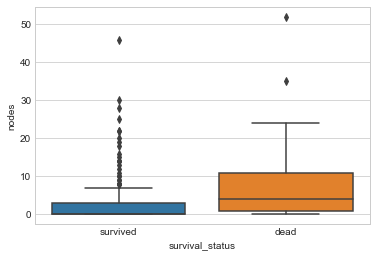

In [209]:
sns.boxplot(x='survival_status',y='nodes',data=df) #plotting the box plot from seaborn between nodes and survival status

We can observe that 25% of the people who survived have nodes <=1 and 75% of people have nodes <=5.

We can also observe that 50% pf the people who died have nodes >=5.

By which we can assume that people with more number of nodes tend to die more than people with less number of nodes from 5 years after the operation.

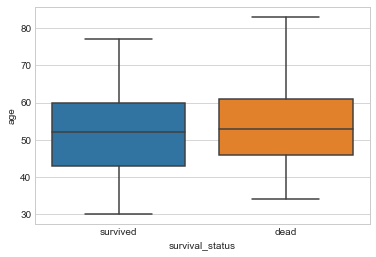

In [215]:
sns.boxplot(x='survival_status',y='age',data=df)

We can observe that 75% of people who survived have their age <=60
While about 75% of people who died have their ages >=45

## Violin Plots

Violin plots combine both pdf's and boxplots to give an accurate depiction of data.

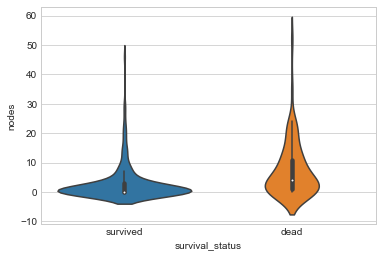

In [210]:
sns.violinplot(x='survival_status',y='nodes',data=df)

By observation we can identify that people with lesser number of nodes have survived more than people with more number of nodes.

The probablity curve in 'survived' feature has a sharp inclination at the beginning, indicating that most of the people who survived have lesser number of nodes.

Where as the curve in 'dead' feature has a more distributed region to it indicating that people who died have more varied and increasing number of axillary nodes.

## Multivariate Analysis

Pairplots from seaborn has been used to analyse data because most of the data is quantitative.

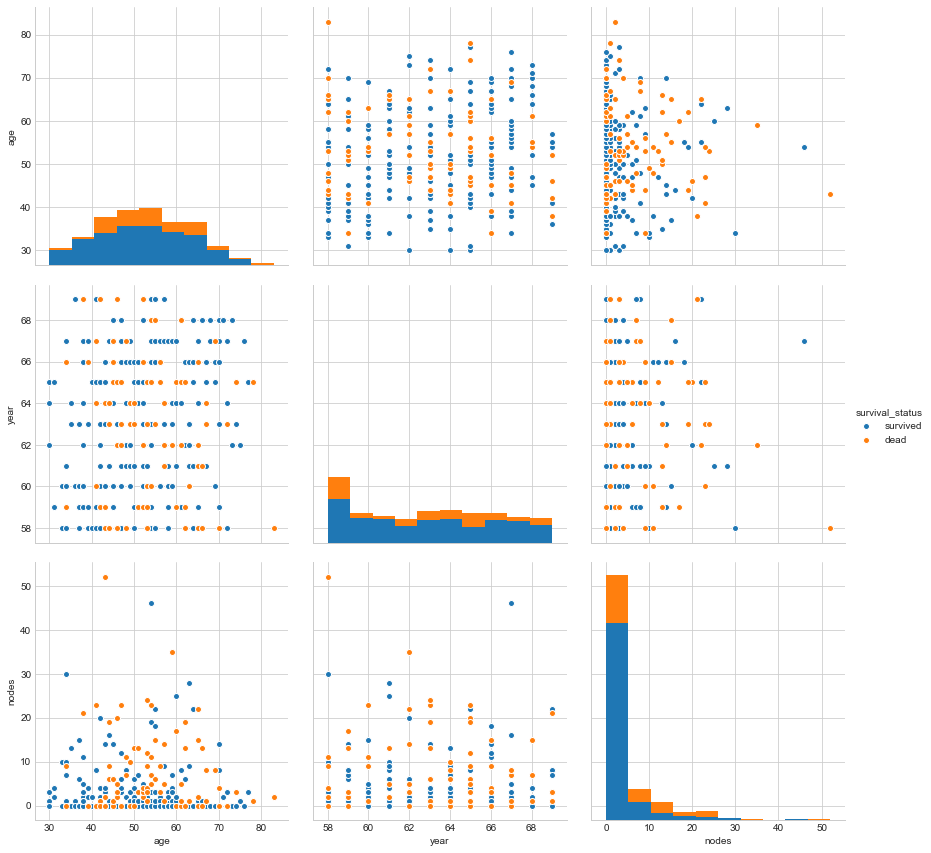

In [155]:
sns.pairplot(df,hue='survival_status',size=4) #Pair plot which plots every feature in the dataset

Pair plots which visualize how the attributes vary with respect to each other.

The scatter plot between nodes vs age shows that most of the patients who survived have less than 10 nodes.

It can also be observed from the nodes vs year plot that most the patients from the year 65 haven't lived past 5 years.

Text(0.5,1,'age vs nodes')

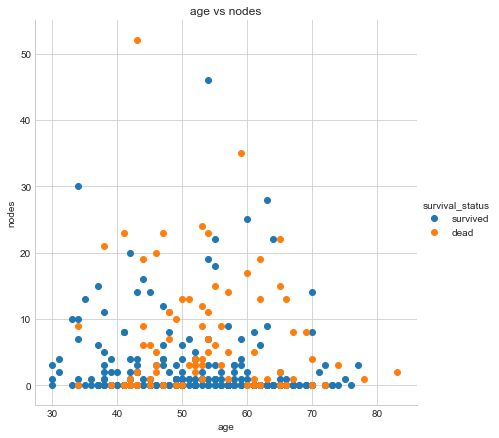

In [187]:
sns.FacetGrid(df,hue='survival_status',size=6).map(plt.scatter,'age','nodes').add_legend()
plt.title('age vs nodes')

The scatter plot between age and nodes

We can observe that people who have lesser number of nodes have survived for greater than 5 years than others.

It can also be obeserve that people with <=1 node tend to have survived longer than 5 years post operation.

# Summary

 The data has four features and each has 306 data points in them making it a relatively small set for observations

 The objective is to determine the characteristics of people who have survived 5 years post operation. The findings are as      
 follow:

1. The average age of the patients who underwent the operation is around 50.


2. Patients who underwent operation have ages between 30 and 80.


2. we observed that 73% of the people who underwent the operation survived past 5 years.


3. It has been obatained that 26% of the people who underwent the operation did not live past 5 years


4. 75% of the patients have their age below 60.


5. It has been observed that people below the age <=50 tend to have survived than people above the age of >50.


6. Hence we can assume that 'age' affect the patients percentage of surival.


7. It has been observed that a lot of the patients have nodes less than 1


8. Patients who have nodes more than >=1 tend to have died more than peo.


9. From the data we have observed that 64% of people have <=1 node.


10. People with nodes 0 or <=1 tend to have survived more post operation for longer than 5 years.


11. Hence we can assume that the number of 'nodes' affect the percentage of survival of a patient.
    
    
12. We have observed that when people who have youger age, even with higher number of nodes there is a chance of survival


13. however as age increases, people with more nodes during older age tend to have died.

#### Important Features

1. Number of nodes is important as we have observed that people with less number of nodes have survived past 5 years
    post operation than people with more number of nodes.
    
    
2. Age isn't impactful, however it has been observed that younger patients with more nodes have survived past 5 years and              
   hence should duly be noted.
